# Optimización de Hiperparámetros

¡Gracias Martín Gonella por la creación de los contenidos de este encuentro!


Comenzamos a trabajar con Optimización de Hiperparámetros en Python con Scikit-Learn, para ello vamos a empezar con ejemplo guiado usando como conjunto de datos el mismo dataset que en el Notebook anterior, Breast Cancer Wisconsin (diagnostic) dataset . Al finalizar, proponemos un análisis similar, pero con otro conjunto de datos. 

## 1. Breast Cancer Wisconsin (diagnostic) dataset

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
import seaborn as sns

**Para investigar:** ¿Reconoces todas las librerías que acabamos de importar y sus objetos? Si no es así, recuerda simpre leer la documentación.

Importamos el dataset así como hicimos en el notebook anterior.

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Si observan la variable `data`, podrán notar que es un `diccionario`, por lo tanto vamos a proceder a convertirlo en un `DataFrame` de Pandas.

In [3]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

Y, como ya lo exploramos, simplemente vamos a seleccionar los atributos que utilizaremos.

In [4]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [5]:
data = df[features_mean + ['target']]
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


Procedemos a separar los `features` del `target`, para luego poder dividir los datos en conjunto de `train` y `test`.

In [6]:
X = data.drop(['target'],axis=1)
y = data['target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Genial, ¡ya tenemos listos nuestros datos!

Ahora vamos a escoger un modelo de clasificación, vamos con un `KNeighborsClassifier`. Luego, puedes probar con algún otro clasificador.

In [7]:
knn = KNeighborsClassifier()

Como recordarás de la bitácora, vimos tres estrategias para realizar una optimización de hiperparámetros:

    * Manual.
    * Por grilla.
    * Aleatoria.
    
Como ya mencionamos la búsqueda manual puede resultar muy tediosa y poco eficiente, por lo tanto vamos a probar con las dos restantes: **aleatoria** y por **grilla**. Además, ya tenemos una idea del desempeño de estos modelos sobre este dataset del encuentro anterior.

### 1.1 Grid Search

Definamos las grillas que necesitamos para el `GridSearchCV`. ¿Que tipo de objeto - desde el punto de vista de la programación - es? Prestar atención también qué tipo de datos usamos para cada hiperparámetro. Como siempre, mirar la documentación de la clase.

In [8]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

Una vez definida la grilla, ya podemos entrenar el modelo. 

In [9]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

Genial, ya tenemos entrenado nuestro modelo KNN para una grilla de hiperparámetros. Además, dichas búsquedas por grilla vienen acompañadas de un validación cruzada, por lo cuál también hemos validado correctamente cada modelo con su correspondiente configuración de hiperparámetros.

<img src="https://media.giphy.com/media/rVbAzUUSUC6dO/giphy.gif" width="400" />

**Pero, ¿Cómo elijo la mejor configuración? ¿Cuál es la mejor performance? ¿Y el resto de los resultados?**

**Pista:** La respuesta correcta siempre se encuentra en la documentación.

Existen 3 atributos del modelo (clase de la librería sklearn) que nos van a ayudar a responder éstas preguntas: `best_params_`, `best_score_` y `cv_results_`

**Para investigar:** Antes de continuar con la ejecución de la notebbok, lee un poco más acerca de la documentación en general de [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [`RandomizedSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) y en particular sobre los 3 atributos que acabamos de mencionar.

<img src="https://media.giphy.com/media/2k8EwXEwhoQGQ/giphy.gif" width="400" />

In [10]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}
Mejor Score: 0.8872777017783857



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005608,0.001361,0.008803,0.002487,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
1,0.003802,0.000400,0.002402,0.000490,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
2,0.000600,0.001201,0.006966,0.007190,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.835294,0.847059,0.835294,0.811765,0.844952,0.027685,371
3,0.003129,0.006258,0.003125,0.006250,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
4,0.006250,0.007655,0.003125,0.006250,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.894118,0.941176,0.811765,0.870588,0.882599,0.042162,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.002995,0.000009,0.002598,0.000502,kd_tree,10,17,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.895349,0.870588,0.941176,0.835294,0.870588,0.882599,0.034986,31
376,0.003199,0.000402,0.005210,0.000751,kd_tree,10,18,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.906977,0.870588,0.952941,0.835294,0.870588,0.887278,0.039898,1
377,0.002035,0.001242,0.001601,0.001357,kd_tree,10,18,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.895349,0.882353,0.941176,0.835294,0.870588,0.884952,0.034491,11
378,0.000000,0.000000,0.009379,0.007658,kd_tree,10,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.906977,0.858824,0.952941,0.823529,0.870588,0.882572,0.044139,131


En este DataFrame están todos los resultados que devuelve `GridSearchCV()`. Hay mucha información para explorar, pero corre las siguientes celdas antes de hacerlo.

Ya leímos la documentación y por lo tanto ya sabemos que podemos predecir con el mejor modelo de la siguiente manera:

In [11]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

¿Por qué predecimos sobre el conjunto de test?¿Estuvo involucrado este conjunto en el entrenamiento del modelo?

In [12]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[44 10]
 [ 1 88]]


In [13]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.9230769230769231


In [14]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        54
         1.0       0.90      0.99      0.94        89

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



**Para pensar**: ¿mejoró el desempeño del modelo con respecto a lo que hicimos en la bitácora anterior?¿Qué otros hiperparámetros puedes explorar para ver si mejora el desempeñó?¿Se puede hacer una mejor exploración de los resultados de `GridSearchCV`? Ahora sí, tómate un tiempo para explorar toda la información que devuelve.

**Ejercicio - Challenge:** Repite lo que hicimos, pero para un árbol de decisión. Algunos hiperparámetros que pueden ser interesantes de explorar, en este caso, son: `criterion`, `max_depth`, `min_samples_split` y `min_samples_leaf`.

In [16]:
tree = DecisionTreeClassifier()

In [17]:
# Grilla para Grid Search
param_grid = {'max_depth':np.arange(1, 20),
              'criterion': ['gini', 'entropy'], 
              'min_samples_split':[2,3,4,6,8],
              'min_samples_leaf':np.arange(1, 10)}

In [18]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(tree, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 3, 4, 6, 8]})

In [19]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
Mejor Score: 0.9436114911080713



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005005,0.000895,0.003402,0.001200,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.918605,0.917647,0.905882,0.894118,0.929412,0.913133,0.012079,430
1,0.004003,0.002002,0.001801,0.000749,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.918605,0.917647,0.905882,0.894118,0.929412,0.913133,0.012079,430
2,0.003803,0.000748,0.002401,0.001021,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.918605,0.917647,0.905882,0.894118,0.929412,0.913133,0.012079,430
3,0.002602,0.000491,0.001601,0.000490,gini,1,1,6,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.918605,0.917647,0.905882,0.894118,0.929412,0.913133,0.012079,430
4,0.002402,0.000490,0.001601,0.000490,gini,1,1,8,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.918605,0.917647,0.905882,0.894118,0.929412,0.913133,0.012079,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,0.003803,0.000400,0.001601,0.000490,entropy,19,9,2,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.906977,0.929412,0.917647,0.905882,0.847059,0.901395,0.028470,1407
1706,0.003406,0.000494,0.001601,0.000490,entropy,19,9,3,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.906977,0.917647,0.917647,0.905882,0.858824,0.901395,0.021872,1407
1707,0.003806,0.000750,0.001805,0.000750,entropy,19,9,4,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.883721,0.917647,0.917647,0.905882,0.882353,0.901450,0.015642,1354
1708,0.003406,0.000487,0.001598,0.000488,entropy,19,9,6,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.883721,0.917647,0.917647,0.905882,0.870588,0.899097,0.018886,1485


In [20]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [21]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[47  7]
 [ 0 89]]


In [22]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.951048951048951


In [23]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        54
         1.0       0.93      1.00      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



### 1.2 Random Search

La metodología es muy parecida. La principal diferencia radica en que, para crear la grilla, ya no debemos pasar valores para los hiperparámetros, sino un generador aleatorio para cada atributo, en aquellos atributos que queremos que explore aleatoriamente.

In [24]:
# Grilla para Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

In [26]:
help(sp.stats.randint(1, 10))

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here

Ya podemos entrenar nuestro modelo. Presta atención al parámetro `n_iter`.

In [27]:
# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017FFC1A1448>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017FFC1A1288>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [28]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}
Mejor Score: 0.8872777017783857



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004003,6.331666e-04,0.004233,0.000744,auto,6,1,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,88
1,0.004203,1.602042e-03,0.004002,0.001095,kd_tree,4,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_ne...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
2,0.002800,9.834833e-04,0.004003,0.002001,kd_tree,6,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_ne...",0.906977,0.858824,0.952941,0.823529,0.870588,0.882572,0.044139,36
3,0.003125,6.250286e-03,0.003125,0.006250,kd_tree,7,13,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.870588,0.941176,0.823529,0.858824,0.877893,0.039197,57
4,0.000000,0.000000e+00,0.003125,0.006250,kd_tree,7,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002802,4.002810e-04,0.002202,0.000400,auto,6,12,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
96,0.003002,6.327331e-04,0.002602,0.000490,auto,3,14,distance,"{'algorithm': 'auto', 'leaf_size': 3, 'n_neigh...",0.895349,0.882353,0.941176,0.823529,0.858824,0.880246,0.039040,49
97,0.002602,4.899991e-04,0.002402,0.000490,kd_tree,7,11,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.870588,0.941176,0.823529,0.870588,0.880246,0.038325,47
98,0.003002,1.907349e-07,0.005203,0.000400,auto,1,4,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.872093,0.870588,0.917647,0.800000,0.858824,0.863830,0.037708,84


¿Encontró algo parecido a Grid Search?¿Fue más rápido?


lo mismo.. me parecio que fue más rápido

In [29]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [30]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[44 10]
 [ 1 88]]


In [31]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        54
         1.0       0.90      0.99      0.94        89

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



---
## Se acabo la parte guiada, ahora es tú turno...

<img src="https://www.mememaker.net/api/bucket?path=static/img/memes/full/2020/Jan/6/10/now-it-s-your-turn-15161.png" width="400" />
    
Ahora es tú turno de aplicar todo lo aprendido con un nuevo conjunto de datos. Para ello, vamos a generarlo de manera artificial usando la función [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) de sklearn.

In [55]:
X, y = make_classification(n_samples=500,n_features=5,n_classes=3,n_clusters_per_class=1)

In [45]:
df = pd.DataFrame(np.c_[X, y])

In [46]:
df.head()

,0,1,2,3,4,5
0,-0.136038,-1.879774,1.395894,-1.946821,-1.557779,1.0
1,-0.021267,-1.647378,4.401866,-0.619725,0.716138,0.0
2,0.182018,0.938967,-1.010750,2.237592,3.201852,2.0
3,0.043485,-0.525979,0.649699,0.359751,1.296927,0.0
4,0.028985,-0.705512,-2.231172,0.157097,1.116119,0.0


In [48]:
X = df.drop([5],axis=1)
y = df[5]

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
knn = KNeighborsClassifier()

In [50]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

In [51]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [56]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

#scores = pd.DataFrame(model.cv_results_)
#scores

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}
Mejor Score: 0.9546666666666667



In [57]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [58]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[41  0  1]
 [ 2 44  2]
 [ 0  1 34]]


In [59]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.952


In [60]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        42
         1.0       0.98      0.92      0.95        48
         2.0       0.92      0.97      0.94        35

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



# circulos

In [27]:
X,y = make_circles(n_samples=500,random_state=45, noise=0.05)

In [28]:
df = pd.DataFrame(np.c_[X, y],columns=['col1','col2','target'])

In [29]:
df.head()

,col1,col2,target
0,0.523698,-0.987836,0.0
1,0.583779,-0.348949,1.0
2,0.247207,0.691232,1.0
3,0.538564,0.808870,0.0
4,0.232666,0.714214,1.0


<AxesSubplot:xlabel='col1', ylabel='col2'>

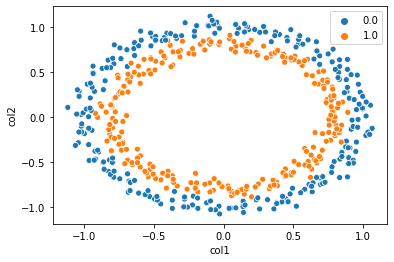

In [30]:
sns.scatterplot(x="col1",y="col2",data=df,hue=df.target.to_list())

In [31]:
X = df.drop(['target'],axis=1)
y = df['target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
knn = KNeighborsClassifier()

In [33]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

In [34]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [35]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

# scores = pd.DataFrame(model.cv_results_)
# scores

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'uniform'}
Mejor Score: 0.9706666666666667



In [36]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [37]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[64  2]
 [ 5 54]]


In [38]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.944


In [39]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        66
         1.0       0.96      0.92      0.94        59

    accuracy                           0.94       125
   macro avg       0.95      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125

